In [108]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [109]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [110]:
grid_files = ["/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc", 
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc",
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_zgr.nc"]

In [111]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)

In [112]:
taux_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-UV_clim/" 
                                + "/CREG12.L75-REF08_*.5d_U2Dclim.nc"))
taux_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-UV_clim" 
                                + "/CREG12.L75-FUT08_*.5d_U2Dclim.nc"))

In [113]:
taux_data_allfilesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08/" 
                                    + "1999/CREG12.L75-REF08_y1999m09d12.5d_gridU.nc"))
tauy_data_allfilesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08/" 
                                    + "1999/CREG12.L75-REF08_y1999m09d12.5d_gridV.nc"))

In [114]:
taux_test = xr.open_mfdataset(taux_data_allfilesFUT, parallel=True, preprocess=prepro)
tauy_test = xr.open_mfdataset(tauy_data_allfilesFUT, parallel=True, preprocess=prepro)

In [115]:
tauy_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-UV_clim/" 
                                + "/CREG12.L75-REF08_*.5d_V2Dclim.nc"))
tauy_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-UV_clim" 
                                + "/CREG12.L75-FUT08_*.5d_V2Dclim.nc"))

In [116]:
ice_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-icemod_clim/" 
                                + "/CREG12.L75-REF08_*.5d_icemodclim.nc"))
ice_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-icemod_clim/" 
                                + "/CREG12.L75-FUT08_*.5d_icemodclim.nc"))

In [117]:
taux_REF = xr.open_mfdataset(taux_data_filesREF, parallel=True, preprocess=prepro)
taux_FUT = xr.open_mfdataset(taux_data_filesFUT, parallel=True, preprocess=prepro)

In [118]:
tauy_REF = xr.open_mfdataset(tauy_data_filesREF, parallel=True, preprocess=prepro)
tauy_FUT = xr.open_mfdataset(tauy_data_filesFUT, parallel=True, preprocess=prepro)

In [119]:
ice_REF = xr.open_mfdataset(ice_data_filesREF, parallel=True, preprocess=prepro)
ice_FUT = xr.open_mfdataset(ice_data_filesFUT, parallel=True, preprocess=prepro)

In [120]:
rho = 1025.

In [121]:
f_x = np.ones(np.shape(grid.ff.squeeze())) * np.nan
f_y = np.ones(np.shape(grid.ff.squeeze())) * np.nan

f_x[0:-1, :] = (grid.ff.squeeze().values[0:-1, :] + grid.ff.squeeze().values[1::, :]) / 2
f_x[-1, :] = grid.ff.squeeze().values[-1, :]
f_y[:, 0:-1] = (grid.ff.squeeze().values[:, 0:-1] + grid.ff.squeeze().values[:, 1::]) / 2
f_y[:, -1] = grid.ff.squeeze().values[:, -1]

f_x = np.where(f_x > 1e-5, grid.ff.squeeze(), np.nan)
f_x[f_x==0] = np.nan
f_y = np.where(f_y > 1e-5, grid.ff.squeeze(), np.nan)
f_y[f_y==0] = np.nan

In [122]:
uEk_REF = tauy_REF.sometauy / (rho * f_y)
vEk_REF = -taux_REF.sozotaux / (rho * f_x)
uEk_FUT = tauy_FUT.sometauy / (rho * f_y)
vEk_FUT = -taux_FUT.sozotaux / (rho * f_x)

In [123]:
wEk_REF = (((uEk_REF[:, 0:-1, 1::] - uEk_REF[:, 0:-1, 0:-1]) / (grid.e1u.squeeze().values[0:-1, 0:-1]))
         + ((vEk_REF[:, 1::, 0:-1] - vEk_REF[:, 0:-1, 0:-1]) / (grid.e2v.squeeze().values[0:-1, 0:-1])))
wEk_FUT = (((uEk_FUT[:, 0:-1, 1::] - uEk_FUT[:, 0:-1, 0:-1]) / (grid.e1u.squeeze().values[0:-1, 0:-1]))
         + ((vEk_FUT[:, 1::, 0:-1] - vEk_FUT[:, 0:-1, 0:-1]) / (grid.e2v.squeeze().values[0:-1, 0:-1])))

In [124]:
uwind = taux_test.uwspd10.squeeze()
vwind = tauy_test.vwspd10.squeeze()
divwind = ((uwind[0:-1, 1::] - uwind[0:-1, 0:-1])
         + (vwind[1::, 0:-1] - vwind[0:-1, 0:-1]))

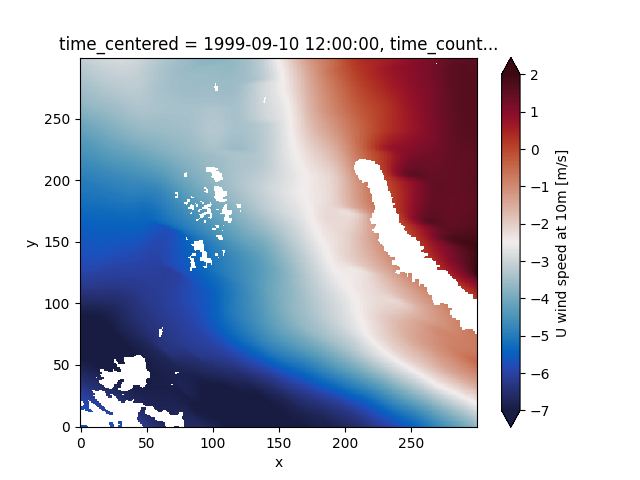

In [107]:
uwind.isel(y=slice(200, 500), x=slice(1000, 1300)).plot(vmin=-7, vmax=2, cmap=cmo.balance)

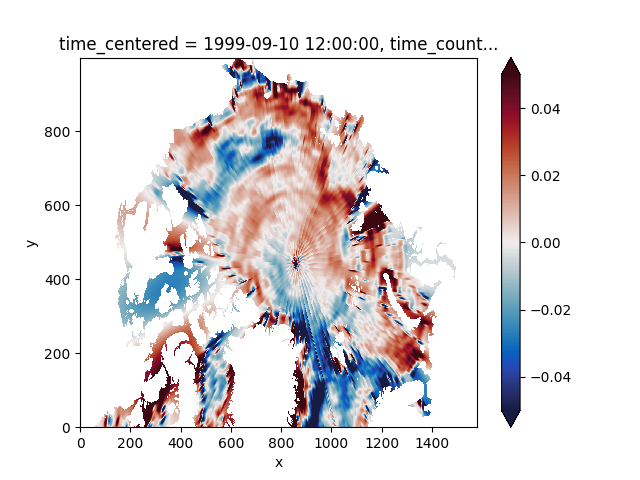

In [76]:
divwind.plot(vmin=-0.05, vmax=0.05, cmap=cmo.balance)

In [39]:
uwind = taux_FUT.uwspd10.isel(time_counter=50)
vwind = tauy_FUT.vwspd10.isel(time_counter=50)
divwind = ((uwind[0:-1, 1::] - uwind[0:-1, 0:-1])
         + (vwind[1::, 0:-1] - vwind[0:-1, 0:-1]))

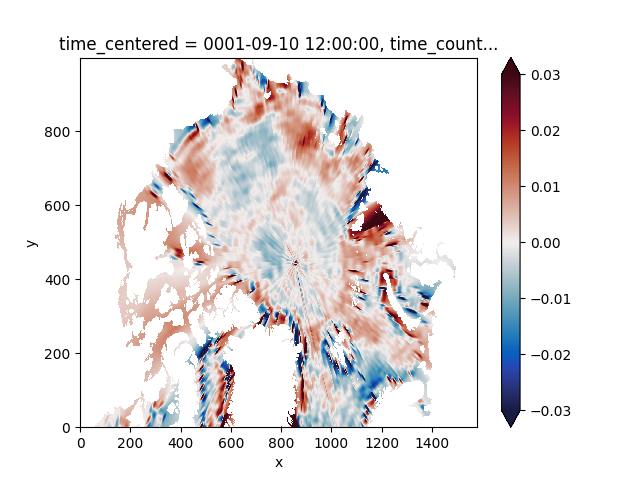

In [40]:
divwind.plot(vmin=-0.03, vmax=0.03, cmap=cmo.balance)

In [125]:
uEkAtm_REF = (tauy_REF.vtau_atmoce * (1 - ice_REF.siconc)) / (rho * f_y)
vEkAtm_REF = -(taux_REF.utau_atmoce * (1 - ice_REF.siconc)) / (rho * f_x)
uEkAtm_FUT = (tauy_FUT.vtau_atmoce * (1 - ice_FUT.siconc)) / (rho * f_y)
vEkAtm_FUT = -(taux_FUT.utau_atmoce * (1 - ice_FUT.siconc)) / (rho * f_x)

In [126]:
wEkAtm_REF = (((uEkAtm_REF[:, 0:-1, 1::] - uEkAtm_REF[:, 0:-1, 0:-1]) / (grid.e1u.squeeze().values[0:-1, 0:-1]))
            + ((vEkAtm_REF[:, 1::, 0:-1] - vEkAtm_REF[:, 0:-1, 0:-1]) / (grid.e2v.squeeze().values[0:-1, 0:-1])))
wEkAtm_FUT = (((uEkAtm_FUT[:, 0:-1, 1::] - uEkAtm_FUT[:, 0:-1, 0:-1]) / (grid.e1u.squeeze().values[0:-1, 0:-1]))
            + ((vEkAtm_FUT[:, 1::, 0:-1] - vEkAtm_FUT[:, 0:-1, 0:-1]) / (grid.e2v.squeeze().values[0:-1, 0:-1])))

In [127]:
uEkIce_REF = (tauy_REF.vtau_iceoce * ice_REF.siconc) / (rho * f_y)
vEkIce_REF = -(taux_REF.utau_iceoce * ice_REF.siconc) / (rho * f_x)
uEkIce_FUT = (tauy_FUT.vtau_iceoce * ice_FUT.siconc) / (rho * f_y)
vEkIce_FUT = -(taux_FUT.utau_iceoce * ice_FUT.siconc) / (rho * f_x)

In [128]:
wEkIce_REF = (((uEkIce_REF[:, 0:-1, 1::] - uEkIce_REF[:, 0:-1, 0:-1]) / (grid.e1u.squeeze().values[0:-1, 0:-1]))
            + ((vEkIce_REF[:, 1::, 0:-1] - vEkIce_REF[:, 0:-1, 0:-1]) / (grid.e2v.squeeze().values[0:-1, 0:-1])))
wEkIce_FUT = (((uEkIce_FUT[:, 0:-1, 1::] - uEkIce_FUT[:, 0:-1, 0:-1]) / (grid.e1u.squeeze().values[0:-1, 0:-1]))
            + ((vEkIce_FUT[:, 1::, 0:-1] - vEkIce_FUT[:, 0:-1, 0:-1]) / (grid.e2v.squeeze().values[0:-1, 0:-1])))

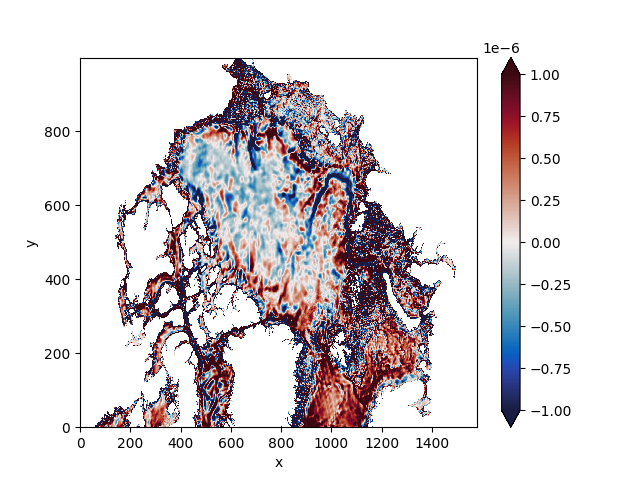

In [133]:
wEk_FUT.mean("time_counter").plot(vmin=-1e-6, vmax=1e-6, cmap=cmo.balance)

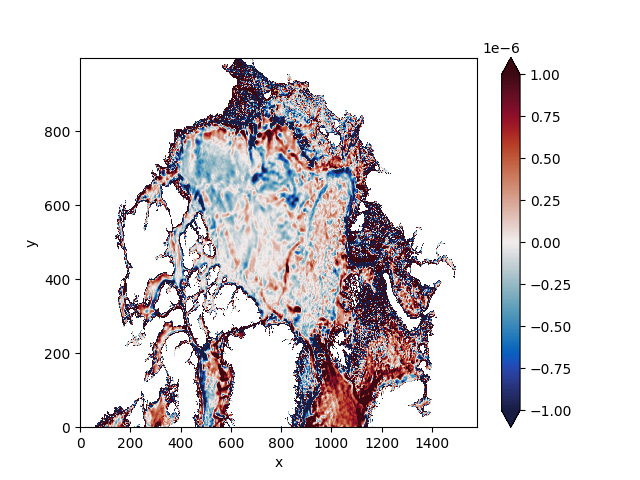

In [134]:
wEk_REF.mean("time_counter").plot(vmin=-1e-6, vmax=1e-6, cmap=cmo.balance)

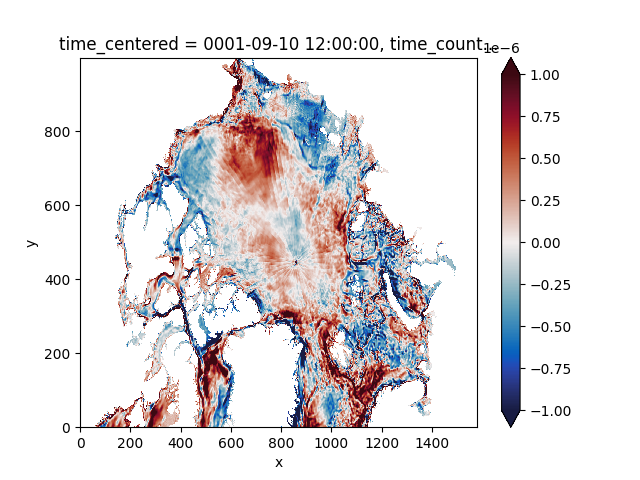

In [27]:
wEkAtm_FUT.isel(time_counter=50).plot(vmin=-1e-6, vmax=1e-6, cmap=cmo.balance)

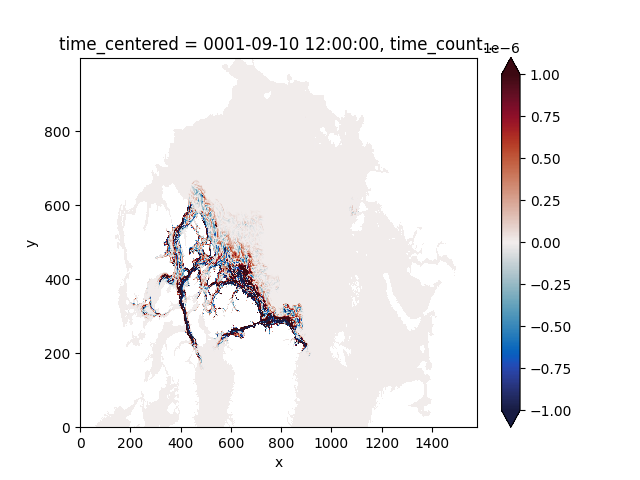

In [28]:
wEkIce_FUT.isel(time_counter=50).plot(vmin=-1e-6, vmax=1e-6, cmap=cmo.balance)

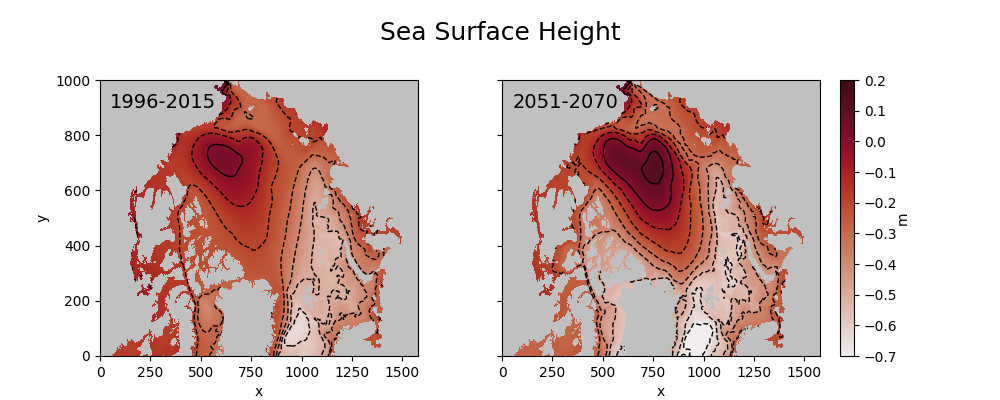

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_facecolor("silver")
a = ax[0].pcolormesh(SSH_REF.x, SSH_REF.y, 
                     SSH_REF.ssh.mean("time_counter").squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
plt.colorbar(a, ax=ax[0], label=r"m")
ax[0].contour(SSH_REF.x, SSH_REF.y, 
              SSH_REF.ssh.mean("time_counter").squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[0].text(50, 900, "1996-2015", fontsize=14)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].set_facecolor("silver")
b = ax[1].pcolormesh(SSH_FUT.x, SSH_FUT.y, 
                     SSH_FUT.ssh.mean("time_counter").squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
cb = plt.colorbar(b, ax=ax[1])
cb.set_label(r"m", labelpad=-1)
ax[1].contour(SSH_FUT.x, SSH_FUT.y, 
              SSH_FUT.ssh.mean("time_counter").squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[1].text(50, 900, "2051-2070", fontsize=14)
ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].set_yticklabels([])

fig.text(0.5, 0.9, "Sea Surface Height", fontsize=18, ha="center");

plt.subplots_adjust(top=0.8, wspace=0.01, left=0.1, right=0.9)

fig.delaxes(fig.axes[2])

#plt.savefig("/home/rieck/figures/CREG12.L75_REFvsFUT_SSH.png", dpi=300)

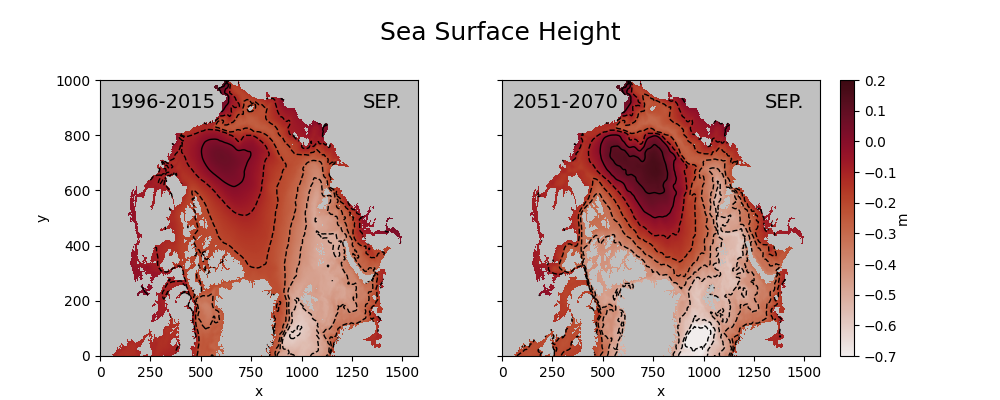

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_facecolor("silver")
a = ax[0].pcolormesh(SSH_REF.x, SSH_REF.y, 
                     SSH_REF.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
plt.colorbar(a, ax=ax[0], label=r"m")
ax[0].contour(SSH_REF.x, SSH_REF.y, 
              SSH_REF.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[0].text(50, 900, "1996-2015", fontsize=14)
ax[0].text(1500, 900, "SEP.", fontsize=14, ha="right")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].set_facecolor("silver")
b = ax[1].pcolormesh(SSH_FUT.x, SSH_FUT.y, 
                     SSH_FUT.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
cb = plt.colorbar(b, ax=ax[1])
cb.set_label(r"m", labelpad=-1)
ax[1].contour(SSH_FUT.x, SSH_FUT.y, 
              SSH_FUT.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[1].text(50, 900, "2051-2070", fontsize=14)
ax[1].text(1500, 900, "SEP.", fontsize=14, ha="right")
ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].set_yticklabels([])

fig.text(0.5, 0.9, "Sea Surface Height", fontsize=18, ha="center");

plt.subplots_adjust(top=0.8, wspace=0.01, left=0.1, right=0.9)

fig.delaxes(fig.axes[2])

#plt.savefig("/home/rieck/figures/CREG12.L75_REFvsFUT_SSH_september.png", dpi=300)